<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [62]:
##### Your Code Here #####
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

#from keras.datasets import boston_housing
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


In [63]:
print(f'Training data : {X_train.shape}')
print(f'Test data : {X_test.shape}')
print(f'Training sample : {X_train[0]}')
print(f'Training target sample : {y_train[0]}')

Training data : (404, 13)
Test data : (102, 13)
Training sample : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training target sample : 15.2


In [64]:
# Reshape the data
X_train = X_train.reshape(404, 13)
X_test = X_test.reshape(102, 13)

In [65]:
# X Variable Types
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [66]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ], dtype=float32)

In [67]:
df = pd.DataFrame(X_train)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.699997,3.9769,4.0,307.0,21.000000,396.899994,18.719999
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.700000,6.2700,2.0,348.0,14.700000,395.380005,3.110000
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.000000,1.3325,24.0,666.0,20.200001,375.519989,3.260000
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.500000,5.9853,5.0,224.0,20.200001,396.899994,8.010000
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.400002,2.5671,24.0,666.0,20.200001,391.429993,14.650000


In [78]:
# Normalizing Data on feature 

X = X_train / np.amax(X_train, axis=0)
y = y_train / 100

#print("Boston Housing \n", X)
#print("Price \n", y)

In [79]:
#import (already done at top but nice to see here)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

np.random.seed(812)

#instantiate the model
model = Sequential(name="MichellesBostonModel")

#define the model
model.add(Dense(1, input_dim=13, activation="sigmoid")) #Relu is valid option.
model.add(Dense(4, input_dim=13, activation='relu', name="Dense1"))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

#binary_crossentropy or categorical_crossentropy depending on info
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae', 'mse'])
#fit the model, use batch_size? says not to if in sequence
model.fit(X, y, epochs=150)

Train on 404 samples
Epoch 1/150
404/404 [==============================] - 1s 1ms/sample - loss: 0.1560 - mae: 0.3839 - mse: 0.1560
Epoch 2/150
404/404 [==============================] - 0s 126us/sample - loss: 0.1440 - mae: 0.3677 - mse: 0.1440
Epoch 3/150
404/404 [==============================] - 0s 100us/sample - loss: 0.1340 - mae: 0.3537 - mse: 0.1340
Epoch 4/150
404/404 [==============================] - 0s 89us/sample - loss: 0.1242 - mae: 0.3396 - mse: 0.1242
Epoch 5/150
404/404 [==============================] - 0s 77us/sample - loss: 0.1146 - mae: 0.3252 - mse: 0.1146
Epoch 6/150
404/404 [==============================] - 0s 84us/sample - loss: 0.1053 - mae: 0.3102 - mse: 0.1053
Epoch 7/150
404/404 [==============================] - 0s 83us/sample - loss: 0.0962 - mae: 0.2952 - mse: 0.0962
Epoch 8/150
404/404 [==============================] - 0s 81us/sample - loss: 0.0873 - mae: 0.2800 - mse: 0.0873
Epoch 9/150
404/404 [==============================] - 0s 84us/sample - lo

In [80]:
scores = model.evaluate(X,y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

404/404 [==============================] - 0s 342us/sample - loss: 0.0057 - mae: 0.0535 - mse: 0.0057
mae: 5.347133055329323


In [81]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 150):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

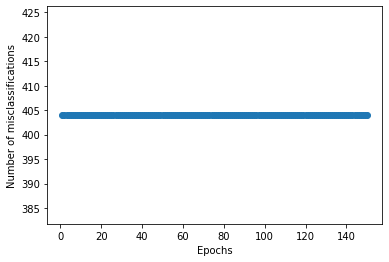

In [82]:
import matplotlib.pyplot as plt

pn = Perceptron(0.1, 150)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show();

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [35]:
##### Your Code Here #####
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train2), (x_test, y_test2) = fashion_mnist.load_data()

In [36]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np

In [37]:
# Hyper Parameters
batch_size = 64
num_classes = 10
epochs = 20

In [38]:
x_train[0].shape

(28, 28)

In [39]:
x_train.shape

(60000, 28, 28)

In [40]:
x_test.shape

(10000, 28, 28)

In [41]:
# Reshape the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [42]:
# X Variable Types
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [43]:
y_train[6] 

7

In [44]:
# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]

y_train2 = keras.utils.to_categorical(y_train2, num_classes)
y_test2 = keras.utils.to_categorical(y_test2, num_classes)

In [45]:
y_train2[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [46]:
mnist_model = Sequential()

# Input => Hidden
mnist_model.add(Dense(16, input_dim=784, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Hidden
mnist_model.add(Dense(16, activation='relu'))
# Output
mnist_model.add(Dense(10,activation='softmax'))

#Compile
mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                170       
Total params: 13,546
Trainable params: 13,546
Non-trainable params: 0
_________________________________________________________________


In [47]:
def neural_network(X):
    
    dense1 = Dense(8, activation='relu', input=X)
    dense2 = Dense(8, activation='relu')(X)
    
    
    return dense2 #or return model

In [49]:
history = mnist_model.fit(x_train, y_train2, batch_size=32, epochs=100, verbose=False)
scores = mnist_model.evaluate(x_test, y_test2)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 1s 58us/sample - loss: 0.5694 - accuracy: 0.8055
accuracy: 80.54999709129333


In [50]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

mnist_model = Sequential()

# Hidden
mnist_model.add(Dense(32, input_dim=784, activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Dense(16, activation='relu'))
mnist_model.add(Dropout(0.2))
# Output Layer
mnist_model.add(Dense(10, activation='softmax'))

mnist_model.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = mnist_model.fit(x_train, y_train2, batch_size=32, epochs=100, verbose=False)
scores = mnist_model.evaluate(x_test, y_test2)
print(f'{mnist_model.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 40us/sample - loss: 0.7512 - accuracy: 0.7883
accuracy: 78.82999777793884


In [56]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

mnist_model2 = Sequential()

# Hidden
mnist_model2.add(Dense(32, input_dim=784, activation='relu'))
mnist_model2.add(Dense(13, activation='relu'))
mnist_model2.add(Dense(16, activation='relu'))

# Output Layer
mnist_model2.add(Dense(10, activation='softmax'))

mnist_model2.compile(loss='categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
mnist_model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_26 (Dense)             (None, 13)                429       
_________________________________________________________________
dense_27 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                170       
Total params: 25,943
Trainable params: 25,943
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = mnist_model2.fit(x_train, y_train2, batch_size=32, epochs=100, verbose=False)
scores = mnist_model2.evaluate(x_test, y_test2)
print(f'{mnist_model2.metrics_names[1]}: {scores[1]*100}')

10000/10000 [==============================] - 0s 42us/sample - loss: 0.5068 - accuracy: 0.8470
accuracy: 84.7000002861023


## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.